##  Steel Dynamics Sustainability: Executive Level Benchmarking & Future Strategies

## Stage 4.  Exploratory Data Analysis (EDA)

Before starting the modeling process, it is crucial to examine and comprehend the data. This includes employing statistical methods and visualizations to uncover patterns, trends, anomalies, and relationships present in the data. Exploratory Data Analysis (EDA) aids in gaining insights and developing hypotheses.

In [1]:
#Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Finished")

Finished


In [2]:
#Convert csv to pandas dataframe 
file_path = "Steel_Stage_4.csv"
df = pd.read_csv(file_path)
print("DataFrame ready")

DataFrame ready


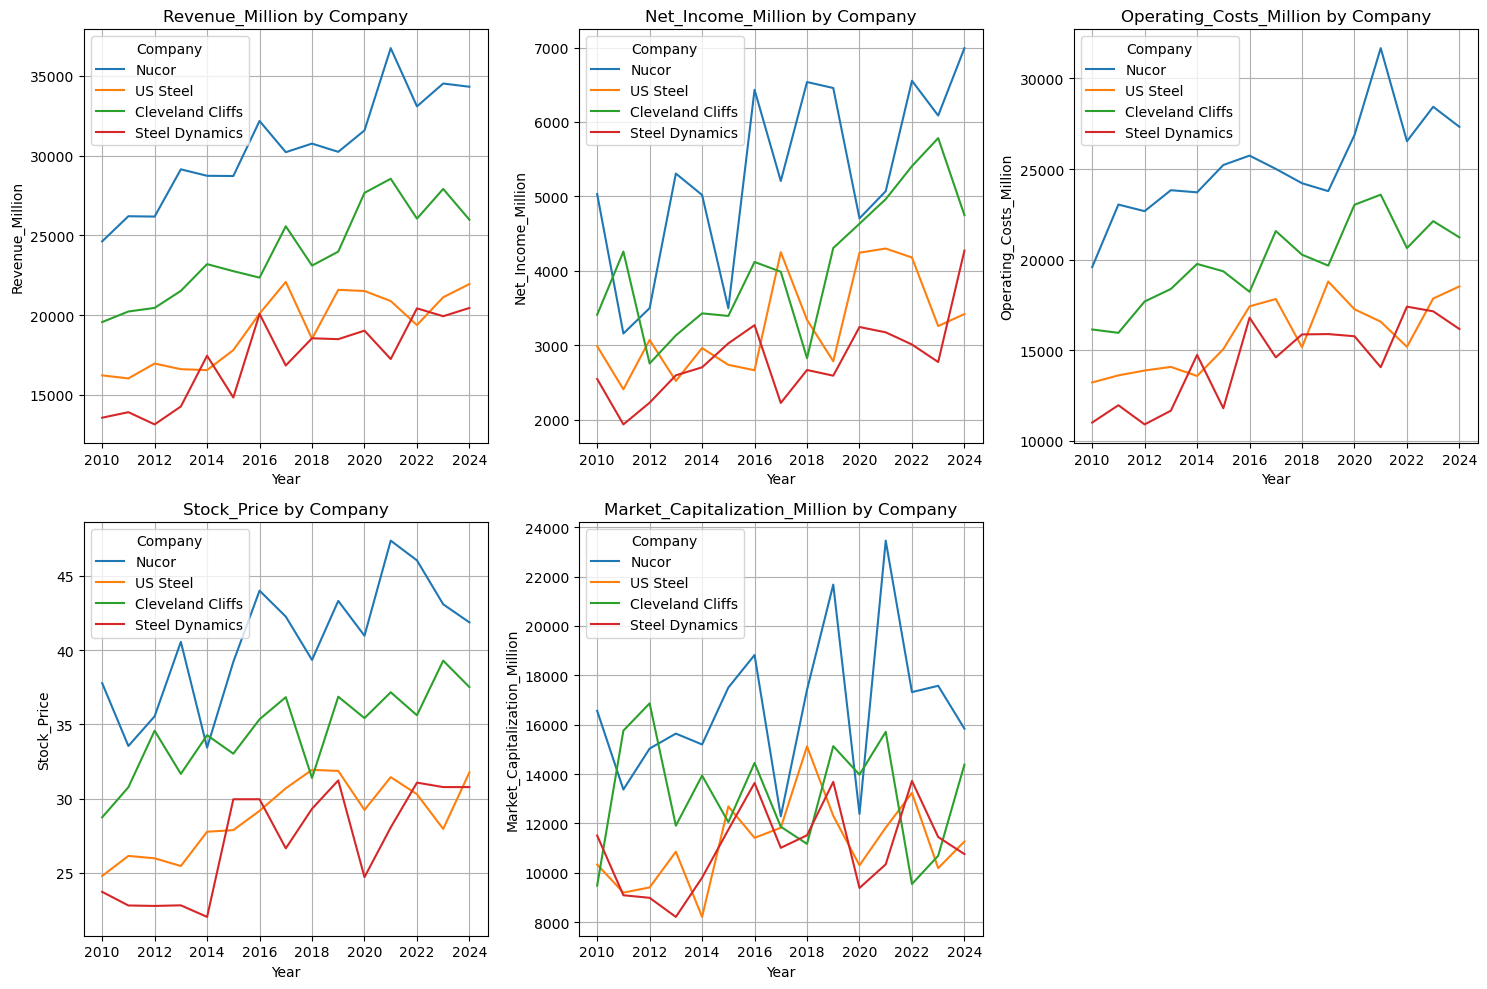

In [3]:
#Columns to plot
financial_columns = ['Revenue_Million', 'Net_Income_Million', 'Operating_Costs_Million', 'Stock_Price', 'Market_Capitalization_Million']

#Create subplots with a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

#Flatten to iterate through subplots
axes = axes.flatten()

#Iterate and create a line plot for each
for i, column in enumerate(financial_columns):
    sns.lineplot(x='Year', y=column, hue='Company', data=df, ax=axes[i])
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'{column} by Company')
    axes[i].legend(title='Company')
    axes[i].grid(True)

#Remove unused subplots
if len(financial_columns) < 6:
    for j in range(len(financial_columns), 6):
        fig.delaxes(axes[j])

#Adjust layout
plt.tight_layout()

#Show plots
plt.show()

Note: It appears that Nucor is the market leader in terms of financial performance, and Steel Dynamics, while improving, is lagging near the bottom. It also looks like most of the financial data is highly correlated. We can explore that further.

In [4]:
#Columns for financial analysis
df_financial = df[financial_columns]

#Calculate correlation matrix
correlation_matrix = df_financial.corr()

#Define high correlation
correlation_threshold = 0.8

#Positive and negative correlations
highly_correlated_pairs = np.where(np.abs(correlation_matrix) > correlation_threshold)

#Create list of pairs
highly_correlated_list = []
for i, j in zip(highly_correlated_pairs[0], highly_correlated_pairs[1]):
    if i < j:  
        highly_correlated_list.append((financial_columns[i], financial_columns[j], correlation_matrix.iloc[i, j]))

#Print highly correlated pairs
if highly_correlated_list:
    print("\nHighly Correlated Pairs (above threshold of", correlation_threshold, "):")
    for pair in highly_correlated_list:
        print(f"Column 1: {pair[0]}, Column 2: {pair[1]}, Correlation: {pair[2]:.3f}") 
else:
    print("\nNo highly correlated pairs found above the threshold of", correlation_threshold)


Highly Correlated Pairs (above threshold of 0.8 ):
Column 1: Revenue_Million, Column 2: Net_Income_Million, Correlation: 0.858
Column 1: Revenue_Million, Column 2: Operating_Costs_Million, Correlation: 0.991
Column 1: Revenue_Million, Column 2: Stock_Price, Correlation: 0.942
Column 1: Net_Income_Million, Column 2: Stock_Price, Correlation: 0.837
Column 1: Operating_Costs_Million, Column 2: Stock_Price, Correlation: 0.925


Note: Since operating cost and stock price are highly correlated with the other variables, we can eliminate them to simplify the analysis. Revenue and net income are also highly correlated and are similar metrics, so we can eliminate net income. Revenue and market value provide a good foundation for our financial performance analysis.

In [6]:
#Drop columns
Remove_Columns = ['Operating_Costs_Million','Stock_Price', 'Net_Income_Million']
df=df.drop(columns=Remove_Columns)
print("Columns dropped from original DataFrame")

Columns dropped from original DataFrame


## Now let's explore the ESG attributes

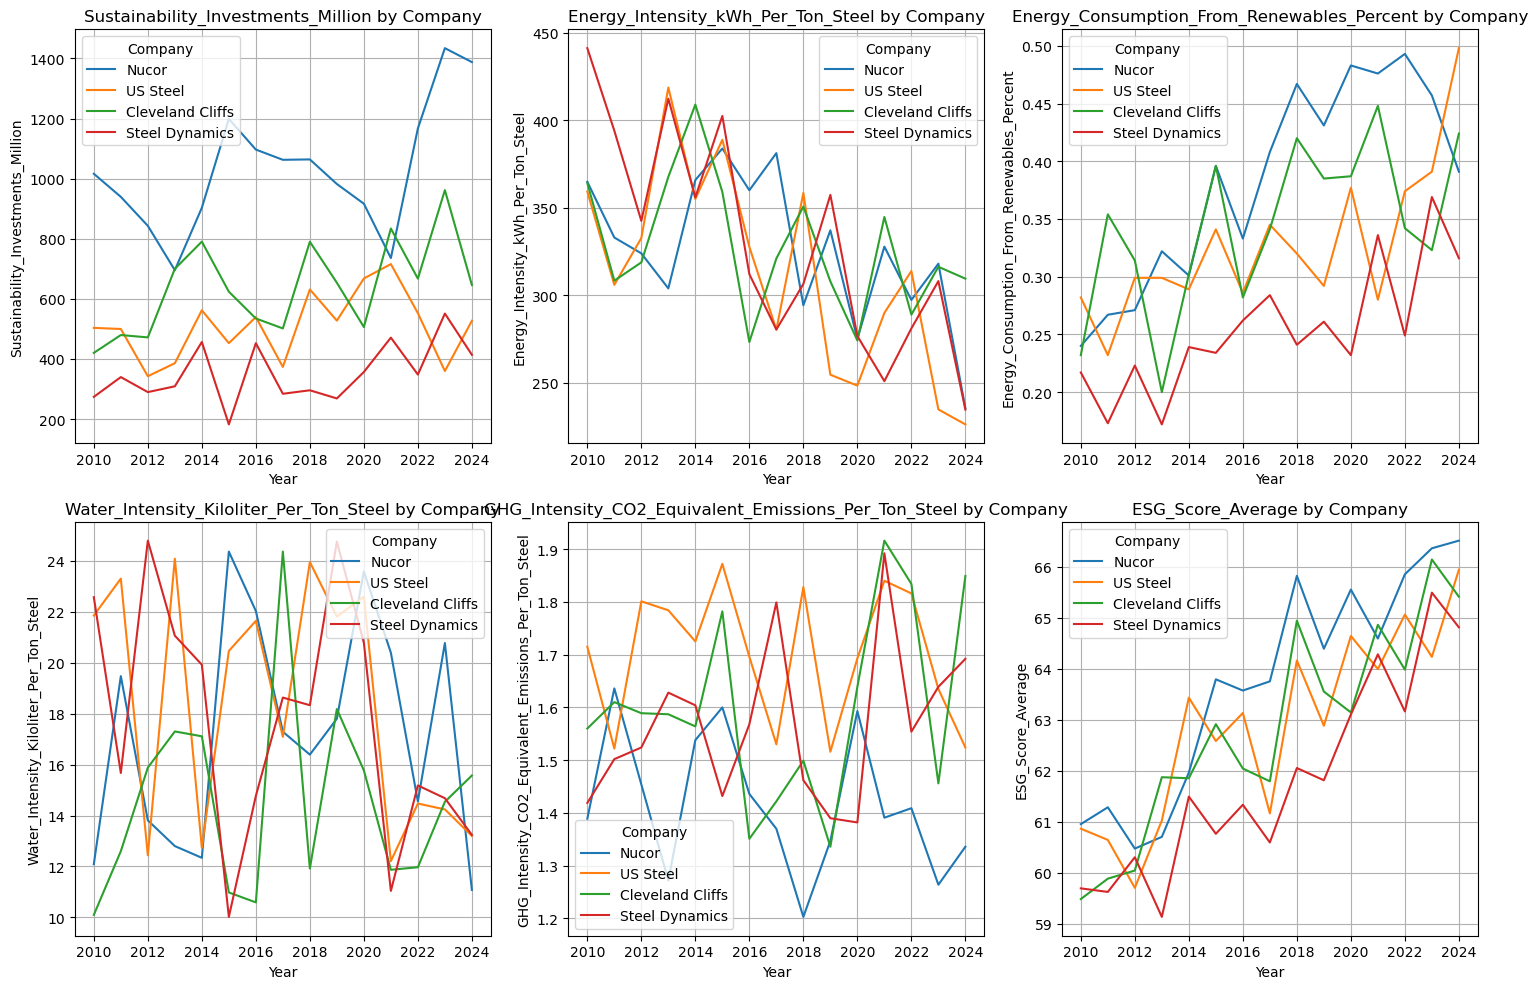

In [7]:
ESG_columns = ['Sustainability_Investments_Million', 'Energy_Intensity_kWh_Per_Ton_Steel', 'Energy_Consumption_From_Renewables_Percent', 'Water_Intensity_Kiloliter_Per_Ton_Steel', 'GHG_Intensity_CO2_Equivalent_Emissions_Per_Ton_Steel', 'ESG_Score_Average']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(ESG_columns):
    sns.lineplot(x='Year', y=column, hue='Company', data=df, ax=axes[i])
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'{column} by Company')
    axes[i].legend(title='Company')
    axes[i].grid(True)
    
plt.tight_layout()

plt.show()

Note: It appears the ESG attributes will have some correlation, and the database can be further reduced to streamline the analysis and results. But this is more complex, and we need to preserve the source of variation for the upcoming machine learning models. ESG score is trending upward for the industry, but Steel Dynamics lags again. Lastly, ESG Score makes for an informative outcome, so we want to use it as a target variable in the future. Next, we can view a correlation heatmap for ESG attributes.

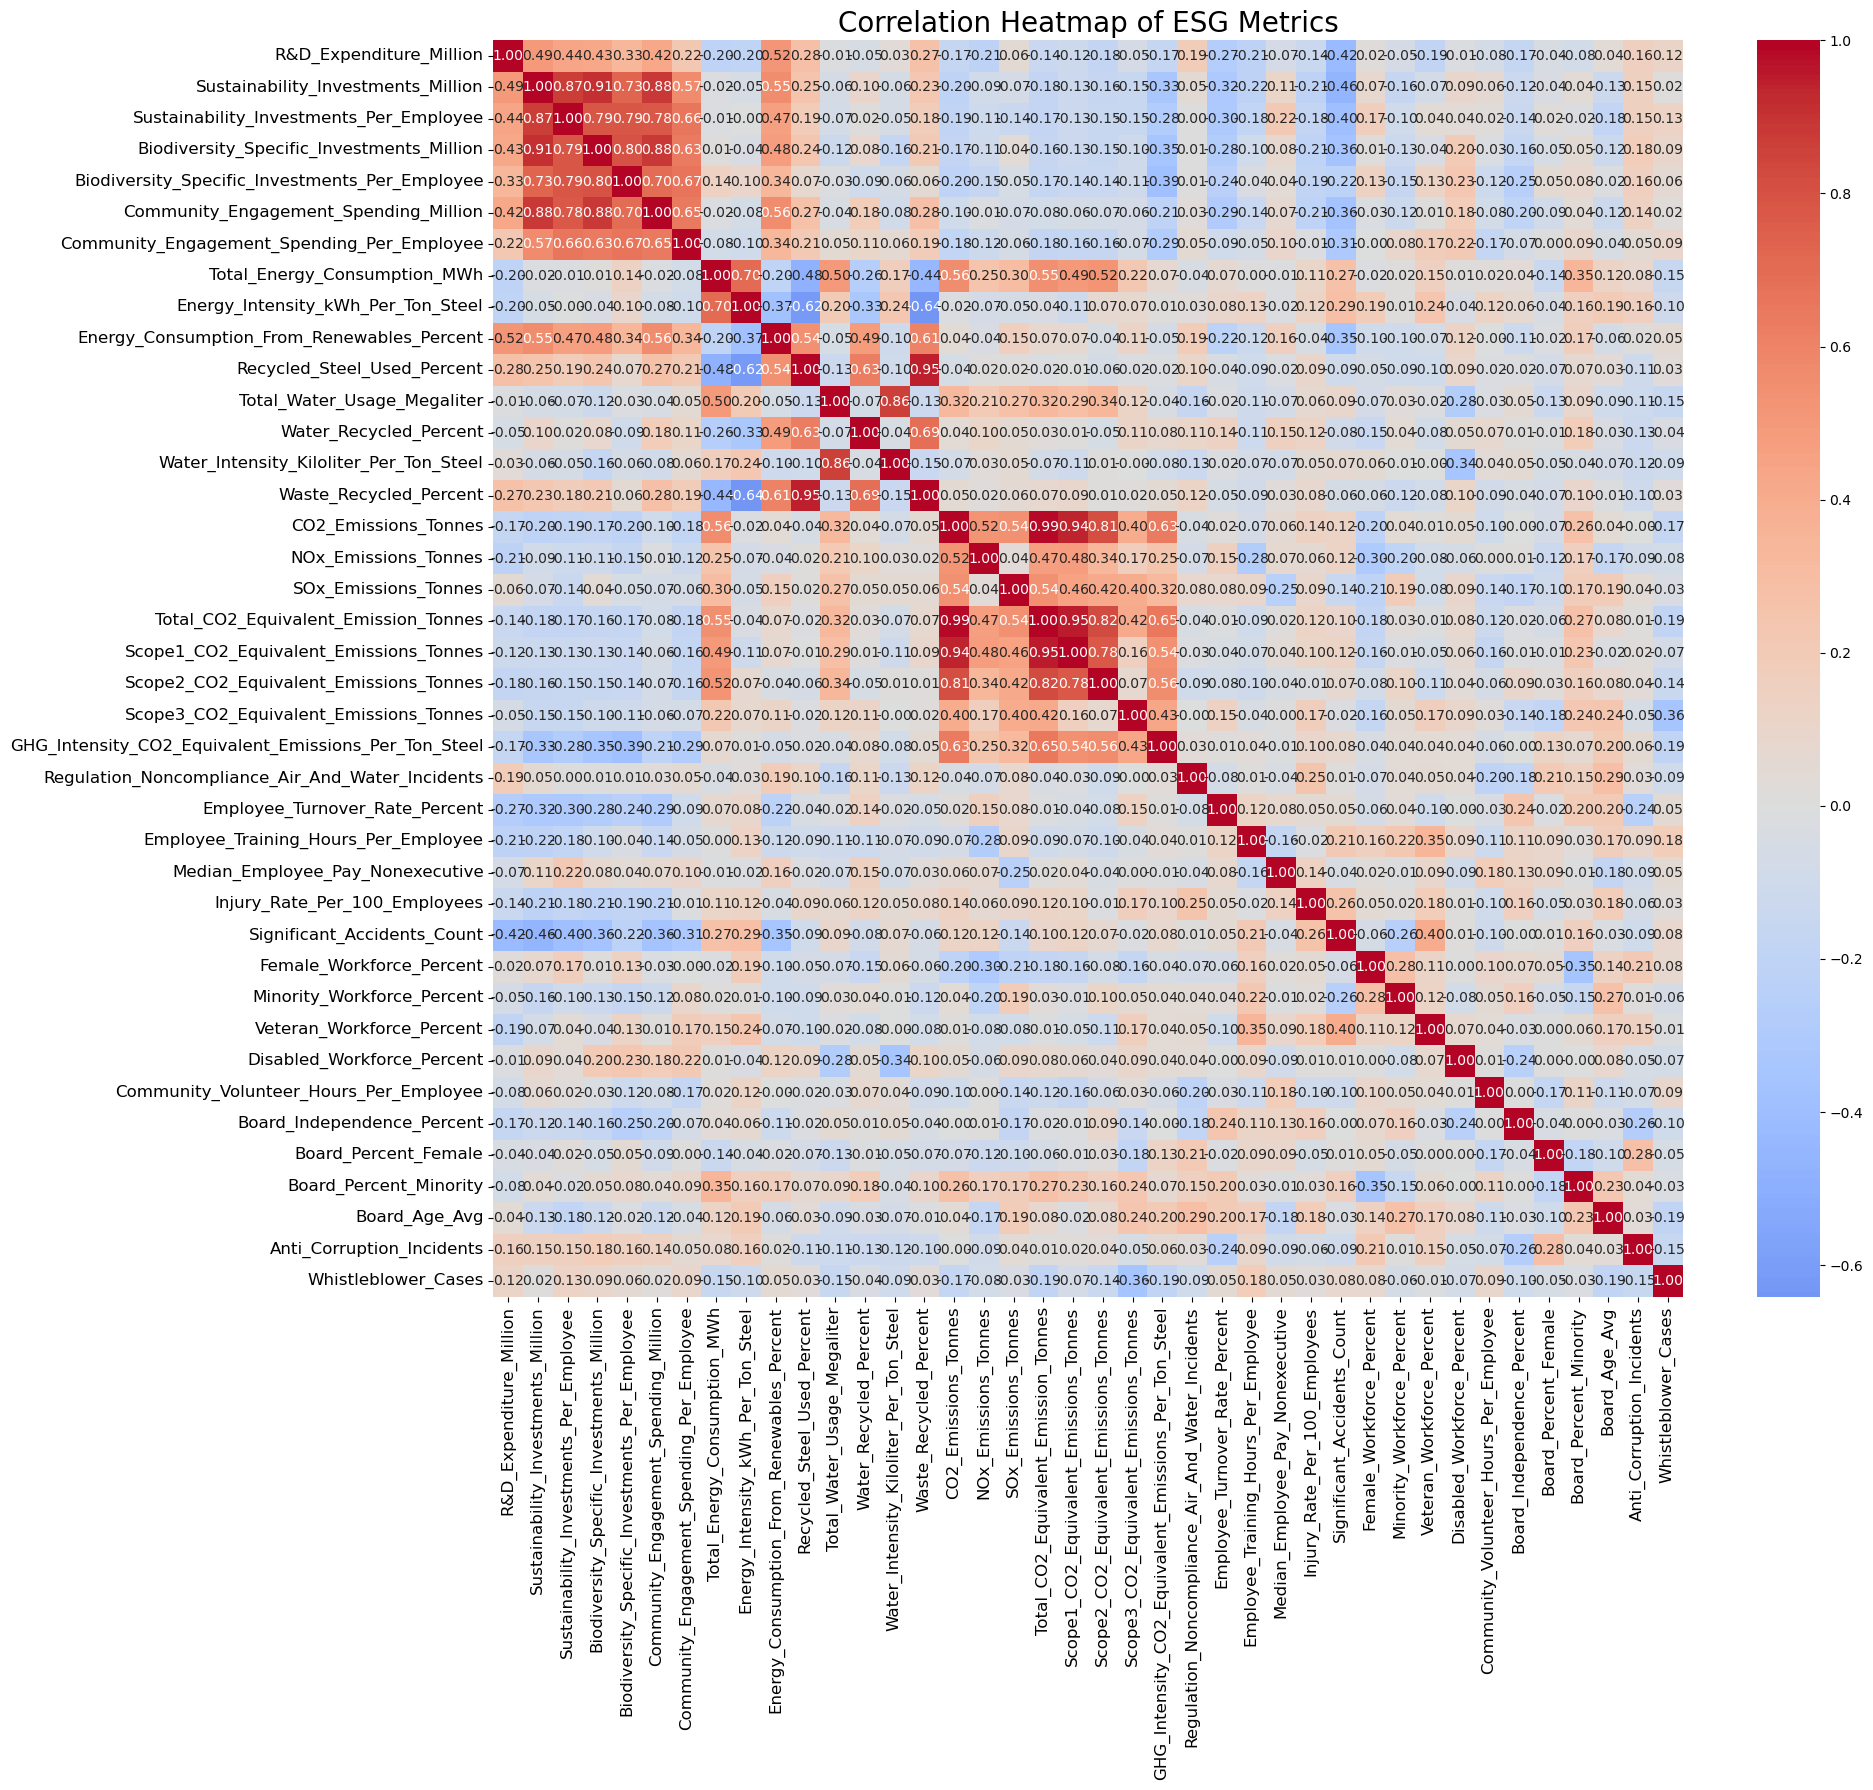

In [9]:
#Columns for correlation matrix
ESG_attributes = [
    'R&D_Expenditure_Million',
    'Sustainability_Investments_Million',
    'Sustainability_Investments_Per_Employee',
    'Biodiversity_Specific_Investments_Million',
    'Biodiversity_Specific_Investments_Per_Employee',
    'Community_Engagement_Spending_Million',
    'Community_Engagement_Spending_Per_Employee',
    'Total_Energy_Consumption_MWh',
    'Energy_Intensity_kWh_Per_Ton_Steel',
    'Energy_Consumption_From_Renewables_Percent',
    'Recycled_Steel_Used_Percent',
    'Total_Water_Usage_Megaliter',
    'Water_Recycled_Percent',
    'Water_Intensity_Kiloliter_Per_Ton_Steel',
    'Waste_Recycled_Percent',
    'CO2_Emissions_Tonnes',
    'NOx_Emissions_Tonnes',
    'SOx_Emissions_Tonnes',
    'Total_CO2_Equivalent_Emission_Tonnes',
    'Scope1_CO2_Equivalent_Emissions_Tonnes',
    'Scope2_CO2_Equivalent_Emissions_Tonnes',
    'Scope3_CO2_Equivalent_Emissions_Tonnes',
    'GHG_Intensity_CO2_Equivalent_Emissions_Per_Ton_Steel',
    'Regulation_Noncompliance_Air_And_Water_Incidents',
    'Employee_Turnover_Rate_Percent',
    'Employee_Training_Hours_Per_Employee',
    'Median_Employee_Pay_Nonexecutive',
    'Injury_Rate_Per_100_Employees',
    'Significant_Accidents_Count',
    'Female_Workforce_Percent',
    'Minority_Workforce_Percent',
    'Veteran_Workforce_Percent',
    'Disabled_Workforce_Percent',
    'Community_Volunteer_Hours_Per_Employee',
    'Board_Independence_Percent',
    'Board_Percent_Female',
    'Board_Percent_Minority',
    'Board_Age_Avg',
    'Anti_Corruption_Incidents',
    'Whistleblower_Cases'
]

#Calculate the correlation matrix
correlation_matrix = df[ESG_attributes].corr()

#Create heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap of ESG Metrics', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Note: In the heatmap above, the red squares indicate strong correlations. These relationships will likely cause issues and will need to be addressed while developing machine learning models. We can view a list of pairs with the strongest correlations.

In [10]:
correlation_threshold = 0.9

highly_correlated_pairs = np.where(np.abs(correlation_matrix) > correlation_threshold)

highly_correlated_list = []
for i, j in zip(highly_correlated_pairs[0], highly_correlated_pairs[1]):
    if i < j:
        highly_correlated_list.append((ESG_attributes[i], ESG_attributes[j], correlation_matrix.iloc[i, j]))

if highly_correlated_list:
    print("\nHighly Correlated Pairs (above threshold of", correlation_threshold, "):")
    for pair in highly_correlated_list:
        print(f"Column 1: {pair[0]}, Column 2: {pair[1]}, Correlation: {pair[2]:.3f}")
else:
    print("\nNo highly correlated pairs found above the threshold of", correlation_threshold)


Highly Correlated Pairs (above threshold of 0.9 ):
Column 1: Sustainability_Investments_Million, Column 2: Biodiversity_Specific_Investments_Million, Correlation: 0.906
Column 1: Recycled_Steel_Used_Percent, Column 2: Waste_Recycled_Percent, Correlation: 0.946
Column 1: CO2_Emissions_Tonnes, Column 2: Total_CO2_Equivalent_Emission_Tonnes, Correlation: 0.986
Column 1: CO2_Emissions_Tonnes, Column 2: Scope1_CO2_Equivalent_Emissions_Tonnes, Correlation: 0.939
Column 1: Total_CO2_Equivalent_Emission_Tonnes, Column 2: Scope1_CO2_Equivalent_Emissions_Tonnes, Correlation: 0.949


Note: We can certainly reduce the number of ESG attributes and streamline our presentation to the board of directors. But before we do that, we should explore feature selection in the next stage!

## Export updated CSV file and move on to Stage 5

In [11]:
df.to_csv("Steel_Stage_5.csv", index=False)

print("Export complete")

Export complete


<br>
Author: Kevin Pordon - MBA